In [12]:
%matplotlib inline
from scipy import misc
from scipy.ndimage import gaussian_filter
from PIL import Image
import numpy as np
from skimage.util import random_noise
import os
from skimage.filters import gaussian

import matplotlib.pyplot as plt

In [3]:
l = os.listdir('Database/cleanImg/')
image = Image.open('Database/cleanImg/{}'.format(l[1]))
image_arr = np.array(image)
image_arr.shape

(600, 800, 4)

In [10]:
def local_normalize(images, sigma1, sigma2):
    if len(images.shape)==4:
        for i in range(images.shape[0]):
            
            B=np.zeros_like(images[0,:,:,0])
            S=np.zeros_like(images[0,:,:,0])
            for j in range(images.shape[3]):
                B+=gaussian_filter(images[i,:,:,j],sigma1)
            
            for j in range(images.shape[3]):
                images[i,:,:,j] = images[i,:,:,j] - B/images.shape[3]
            
            for j in range(images.shape[3]):
                S+=np.sqrt(gaussian_filter(images[i,:,:,j]**2, sigma2))
            
            for j in range(images.shape[3]):
                images[i,:,:,j] = images[i,:,:,j] / (S/images.shape[3])
    else:
        images = (images-np.min(images))/(np.max(images)-np.min(images))
        images = images - gaussian(images,sigma1,multichannel=False)
        images = images / np.sqrt(gaussian(images**2, sigma2,multichannel=False))
        
    return images

In [4]:
if image_arr.shape[-1] == 4:
    image_arr = image_arr[:,:,:-1]
    
image_arr = image_arr.astype(float)

image_arr /= 255

if len(image_arr.shape) == 3:
    weights = np.array([1, 1, 1])
    image_arr = np.dot(image_arr, weights)

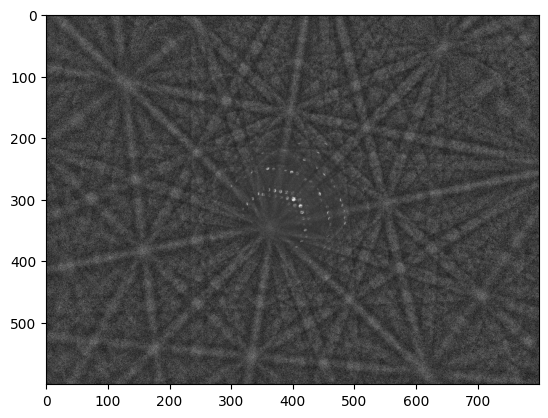

In [5]:
plt.imshow(image_arr, cmap = 'gray')

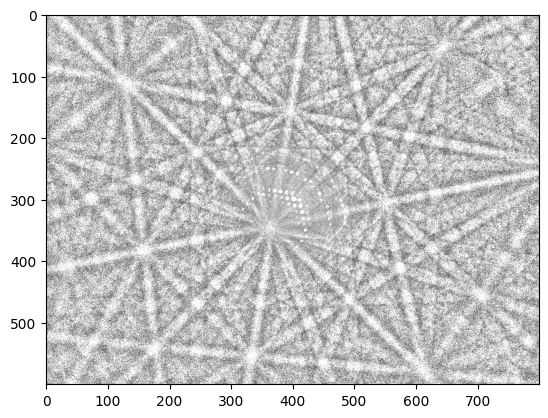

In [8]:
def add_poisson_noise(image):
    return random_noise(image, mode='poisson')
noisy_image_p = add_poisson_noise(image_arr)
plt.imshow(noisy_image_p, cmap = 'gray')

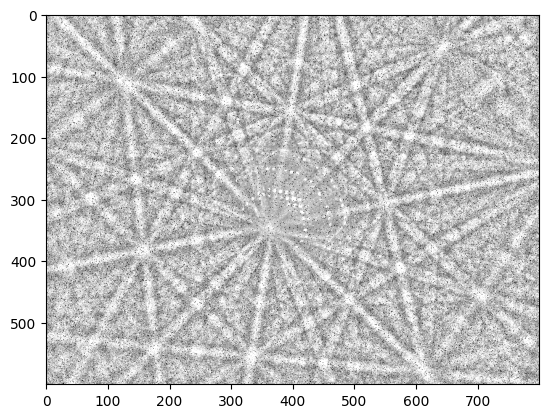

In [24]:
def add_gaussian_noise(image):
    return random_noise(image, mode='s&p')
noisy_image_g = add_gaussian_noise(image_arr)
plt.imshow(noisy_image_g, cmap = 'gray')